# Golden ratio search

Se considera el problema de encontrar de encontrar un mínimo para la función $f(x)$. Un método básico para ello es el *golden ratio search*. Con este método se pueden encontrar mínimo **locales** y **globales** (sin distinción). 

<img src="grafica641.png">

Necesitamos 3 puntos (no necesariamente equiespaciados) al que añadiremos otro punto. De la figura, suponga que al menos uno de los valores $f(x_2)$ y $f(x_3)$ en los puntos intermedios es menor que los valores $f(x_1)$ y $f(x_4)$ en los puntos en los extremos. En ese caso, sabemos que hay un mínimo entre $x_1$ y $x_4$, pues la función baja y sube. Luego, podemos limitar la búsqueda comparando los valores de $f$ en $x_2$ y $x_3$, para seleccionar al menor de ellos.

- Si $f(x_2) < f(x_3)$: El mínimo debe estar entre $x_1$ y $x_3$.

- Si $f(x_2) > f(x_3)$: El mínimo debe estar entre $x_2$ y $x_4$.

Mediante este proceso, podremos reducir el rango de búsqueda del mínimo: escogiendo tres números y añadiendo un cuarto. Se repite el proceso hasta que el mínimo se encuentre en un intervalo de menor tamaño al de la precisión especificada, luego tomamos el punto medio del intervalo como el resultado para la posición del mínimo.

## Escoger puntos interiores

Para dos posiciones extremas $x_1$ y $x_4$, los dos puntos interiores deben estar simétricamente distribuidos respecto al punto medio del intervalo. Entonces: $$x_2-x_1=x_4-x_3$$

Como queremos que el método sea eficiente, es conveniente elegir los puntos tal que el intervalo en que buscamos el mínimo, decrezca lo más posible en cada paso del proceso y el que sigue.

Definimos $z$ como la razón entre el ancho del intervalo antes y después de un paso de la búsqueda. Si suponemos que el mínimo cae en la parte izquierda del intervalo, entre $x_1$ y $x_3$, entonces
$$z = \dfrac{x_4-x_1}{x_3-x_1} = \dfrac{(x_2-x_1+x_3)-x_1}{x_3-x_1} = \dfrac{x_2-x_1}{x_3-x_1} + 1$$ 
El siguiente paso debe satisfacer
$$z = \dfrac{x_3-x_1}{x_2-x_1}$$
Si los algoritmos deben ser igualmente eficientes para ambos pasos, entonces se debe resolver la ecuación $$z = \dfrac{1}{z}+1$$ que tiene como solución mayor a 1 $$z = \dfrac{1+\sqrt{5}}{2} = 1.618\dots$$

Esto también se cumple si se reduce el intervalo por la derecha. $z$ se denomina *golden ratio*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden

In [2]:
def ploting(f, x):
    plt.plot(x,f(x),label='function')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

In [3]:
# otra opción: scipy.optimize.golden

def GRS(f, x_initial, accuracy=1e-4):
    # Posiciones iniciales
    x1, x4 = x_initial
    x2 = x4 - (x4 - x1)/golden
    x3 = x1 + (x4 - x1)/golden
    
    # Valores iniciales de la función en los
    # primeros cuatro puntos
    f1, f2, f3, f4 = f(x1), f(x2), f(x3), f(x4)
    
    # Golden ratio search
    while x4 - x1 > accuracy:
        # Si f(x2) < f(x3) -> intervalo a la izquierda
        if f2 < f3:
            x4, f4 = x3, f3
            x3, f3 = x2, f2
            x2 = x4 - (x4-x1)/golden
            f2 = f(x2)
        # Si f(x3) <= f(x2) -> intervalo a la derecha
        else:
            x1, f1 = x2, f2
            x2, f2 = x3, f3
            x3 = x1 + (x4 - x1)/golden
            f3 = f(x3)
    
    print("El mínimo está en {0: .2f}".format(0.5*(x1 + x4)))
    return 0.5*(x1 + x4)

# Potencial de Buckingham

Aproximación del potencial de interacción entre átomos de un sólido o gas. en función de la distancia $r$:

$$V(r) = V_0 \left[ \left( \dfrac{\sigma}{r} \right)^6 - e^{-r/\sigma} \right]$$

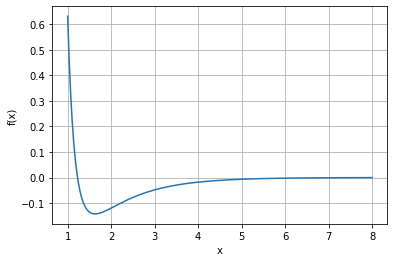

In [4]:
σ = 1.0
ϵ = 1e-6
f = lambda x: (1/x)**6 - np.exp(-x)
r = np.linspace(1,8,200)
ploting(f,r/σ)

In [5]:
# Mínimo en nm
minimum_V = GRS(f, (σ, 2*σ), ϵ)

El mínimo está en  1.63


# Temperatura de un foco

Suponemos que la radiación del filamento del foco a temperatura $T$ obedece la ley de radiación de Planck, entonces, la potencia de radiación por unidad de longitud de onda obedece
$$I(\lambda) = 2\pi Ah c^2 \dfrac{\lambda^{-5}}{e^{hc/\lambda kT}-1}$$

Y de esto la eficiencia del foco está dada por
$$\eta = \dfrac{\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/(e^{hc/\lambda kT}-1) d\lambda}{\int_{0}^{\infty} \lambda^{-5}/(e^{hc/\lambda kT}-1) d\lambda}$$
Con un par de operaciones:
$$\eta(T) = \dfrac{15}{\pi^4} \int_{hc/\lambda_2 kT}^{hc/\lambda_1 kT} \dfrac{x^3}{e^x - 1} dx$$

In [21]:
from scipy.integrate import quadrature
from scipy.constants import c, h, k
from scipy.optimize import golden as grs

In [8]:
T = np.linspace(300,10000,100)
η = np.empty_like(T, float)
F = lambda x: x**3/(np.exp(x) - 1)
λ1, λ2 = 390e-9, 750e-9

for i in range(len(T)):
    η[i] = quadrature(F, h*c/(λ2*k*T[i]), h*c/(λ1*k*T[i]))[0]

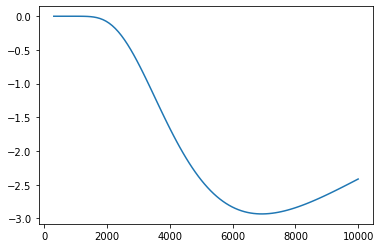

In [28]:
plt.plot(T, -1*η)
plt.show()

In [2]:
# Hallar el máximo = cambiar la posición de las cotas bc negativo
Fp = lambda T: quadrature(F, h*c/(λ1*k*T), h*c/(λ2*k*T))

minimum_T = GRS(Fp,(5000,8000),1)

NameError: name 'golden' is not defined

In [32]:
# No poner tolerancia :D
grs(Fp,brack=(5000,8000))

6928.57927092748